In [22]:
import pymongo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
client = pymongo.Connection()
debates = pd.DataFrame(list(client.politics.debates.find()))
articles = pd.DataFrame(list(client.politics.articles.find()))

In [46]:
articles[articles["topic"] == "Nobel Peace Prize"]["stemmed"]

6     [nobel, peac, prize, nomine, speak, vsu, oct, ...
7     [clinton, congratul, nobel, peac, prize, secre...
8     [dpa, polit, norway, nobel, peac, sidebar, con...
9     [nato, deserv, peac, prize, great, mirth, frid...
26    [slew, world, conflict, fog, nobel, peac, priz...
27    [award, nobel, peac, prize, norwegian, nobel, ...
28    [new, nobel, controversi, europ, won, european...
29    [decis, award, nobel, spark, controversi, peac...
30    [peac, europ, may, often, taken, grant, abstra...
Name: stemmed, dtype: object

In [52]:
def joinStemmed(ls):
    out = []
    if type(ls) == list:
        for l in ls:
            out += [" ".join(x) for x in l]
    else:
        out += [" ".join(x) for x in ls]
    return out

In [66]:
documents = joinStemmed([debates.stemmed[:50],articles[articles["topic"].isin(["Syrian War", "Nobel Peace Prize"])]["stemmed"]])

In [67]:
# no need to normalize, since Vectorizer will return normalized tf-idf
tfidf = TfidfVectorizer().fit_transform(documents)

pairwise_similarity = tfidf * tfidf.T


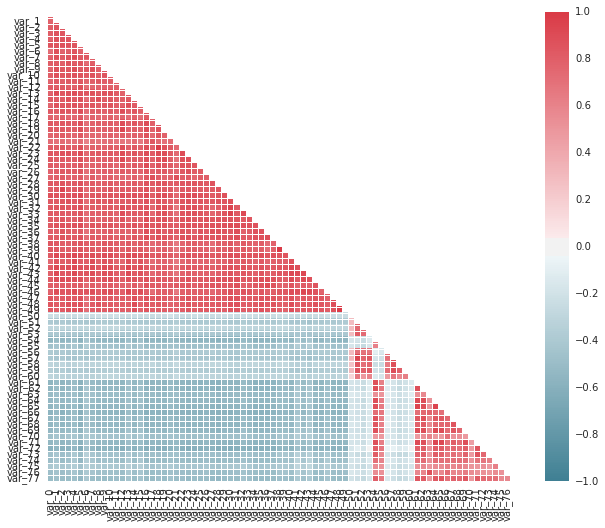

In [101]:
f, ax = plt.subplots(figsize=(9,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(pairwise_similarity.toarray(), annot=False, diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [95]:
def calcSim(source, target):
    len_input = len(source)
    len_target = len(target)
    documents = joinStemmed([source, target])
    tfidf = TfidfVectorizer().fit_transform(documents)
    pairwise_similarity = tfidf * tfidf.T
    rel = (pairwise_similarity.toarray()[len_input:,:len_input])
    return rel

In [98]:
out = {}
for topic in articles.topic.unique():
    sim = calcSim(debates.stemmed, articles[articles["topic"] == topic]["stemmed"])
#     print(topic, sim)
    out[topic] = sim

In [118]:
cmap = sns.light_palette("navy", as_cmap = True)

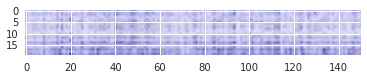

In [119]:
plt.imshow(out["Drought"], cmap = cmap)

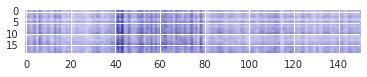

In [120]:
plt.imshow(out["Syrian War"], cmap = cmap)

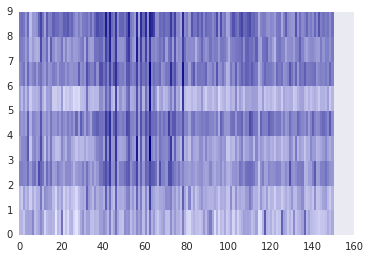

In [121]:
plt.pcolor(out["Nobel Peace Prize"], cmap = cmap)

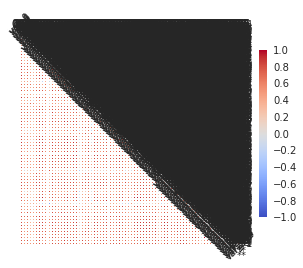

In [117]:
sns.corrplot(out["Drought"])